In [18]:
import numpy as np
import matplotlib.pyplot as plt
#import numpy and matplotlib

## Part (a):

Generate a linearly seperable data set of **size 20** as indicated in Exercise 1.4. Plot the examples {($x_{n}$,$y_{n}$)} as well as the target function *f* on a plane. Be sure to mark the examples from differnt classes differently, and add labels to the axes of the plot.  

In [19]:
N = 20 #set the number of data points in our training set
d = 2 # set the number of dimensions to use 

In [20]:
##creates training data for any number N and dimension d
def get_training_data(N,d):
    X = np.random.uniform(-1,1,size=(N,d+1)) #get random training points
    X[:,0] = 1 #set first value in each tuple equal to 1
    return X

In [21]:
##creates target func in dimension d
def get_target_func(d):
    ## Generate random target function: f(x) = w^T x 
    w = np.random.uniform(-1,1,size=(d+1))
    return w

In [22]:
##computes true/false values for training data 
def compute_true_value(X,w):
    ## Compute true labels for the training data
    Y = np.sign(np.dot(X,w))
    ind_pos = np.where(Y==1)[0] ## positive examples
    ind_neg = np.where(Y==-1)[0] ## negative examples
    return Y,ind_pos,ind_neg

In [23]:
def plot_points_and_f(X,ind_pos,ind_neg,f,d,N):
    x_data = np.linspace(-1,1)
    y_data = ((-(f[1]/ f[2]) * x_data - (f[0]/f[2])))
    
    plt.clf()
    plt.plot(X[ind_pos,1],X[ind_pos,2],'ro') #plot pos points
    plt.plot(X[ind_neg,1],X[ind_neg,2],'bx') #plot neg points
    plt.plot(x_data,y_data, "-g", label="Target function") #plot target func
    plt.plot()
    
    title = "For N = " + str(N) + " and d = " + str(d) #formatting
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training Data - X values")
    plt.ylabel("Training Data - Y output values")

In [24]:
training_data = get_training_data(N,d)
tar_func = get_target_func(d)
Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

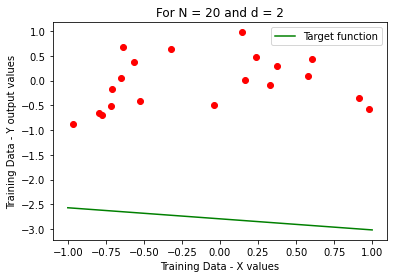

In [25]:
plot_points_and_f(training_data,pos_index,neg_index,tar_func,d,N) 

***
## Part (b):

Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples {($x_{n}$,$y_{n}$)}, the target function *f*, and the final hypothesis *g* in the same figure. Comment on whether *f* is close to *g*.

In [26]:
#create hypothesis function (initially just a random guess)
def get_hyp_func(d):
    g = np.random.uniform(-1,1,size=(d+1))
    return g

In [27]:
def perceptron(g,f,X,f_true_vals):
    hyp_true_vals, h_pos,h_neg = compute_true_value(X,g)
    iterations = 0
    while not np.array_equal(hyp_true_vals,f_true_vals):
        for index, v in enumerate(hyp_true_vals): #find a misclassified example
            if v != f_true_vals[index]:
                break
        g = g + (X[index] * f_true_vals[index]) #otherwise, fix seperator
        hyp_true_vals = np.sign(np.dot(X,g)) #get new labeled values of training set
        iterations += 1
    return g, iterations

In [28]:
def plot_pla(X, ind_pos, ind_neg, f, g, d , N, iterations):
    x_data = np.linspace(-1,1)
    f_y_data = ((-(f[1]/ f[2]) * x_data - (f[0]/f[2])))
    g_y_data = ((-(g[1]/ g[2]) * x_data - (g[0]/g[2])))
    
    plt.clf()
    plt.plot(X[ind_pos,1],X[ind_pos,2],'ro') #plot pos points
    plt.plot(X[ind_neg,1],X[ind_neg,2],'bx') #plot neg points
    plt.plot(x_data,f_y_data, "-g", label="Target function") #plot target func
    plt.plot(x_data,g_y_data, "-y", label="Hypothesis function") #plot hypothesis func

    plt.plot()
    
    title = "For N = " + str(N) + " and d = " + str(d) + ": " + str(iterations) + " total iterations" #formatting
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training Data - X values")
    plt.ylabel("Training Data - Y output values")

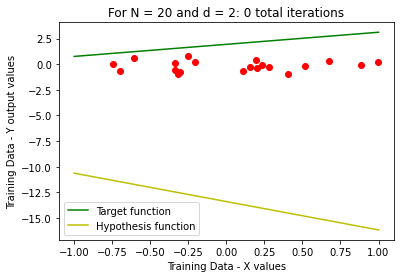

In [29]:
training_data = get_training_data(N,d)
tar_func = get_target_func(d)
Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

original_hyp = get_hyp_func(d)
g, iterations = perceptron(original_hyp,tar_func,training_data,Y)

plot_pla(training_data,pos_index,neg_index,tar_func,g,d,N, iterations)

**Answer**: The algorithm took **5** total iterations to converge. The function *g* looks similiar to *f* (both have positive slope), but they are clearly different functions. 
***

## Part (c):

Repeat (b) with N = 20 and d = 2 once more.

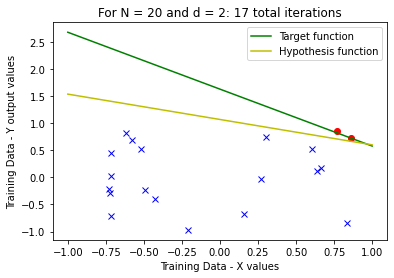

In [30]:
training_data = get_training_data(N,d)
tar_func = get_target_func(d)
Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

original_hyp = get_hyp_func(d)
g, iterations = perceptron(original_hyp,tar_func,training_data,Y)

plot_pla(training_data,pos_index,neg_index,tar_func,g,d,N, iterations)

**Answer**: This experiment took a total of **11** iterations to converege. This result is similiar to the last experiement. Furthermore, the resulting *g* function is similiar in the sense that it has the same type of slope as the target function *f*, but it is different enough from *f* to be clearly visible
***

## Part (d):

Repeat (b) with N = 100 and d = 2.

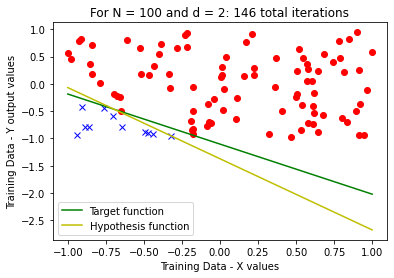

In [31]:
N = 100

training_data = get_training_data(N,d)
tar_func = get_target_func(d)
Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

original_hyp = get_hyp_func(d)
g, iterations = perceptron(original_hyp,tar_func,training_data,Y)

plot_pla(training_data,pos_index,neg_index,tar_func,g,d,N, iterations)

**Answer**: This time, the algorithm took **83** iterations to converge. Similiar to the previous experiements, *f* and *g* are not equal, but still manage to produce equivalent **Y** vectors (this implies all points in **x** are labled the same in both *f* and *g*).
***

## Part (e):

Repeat (b) with N = 1000 and d = 2.

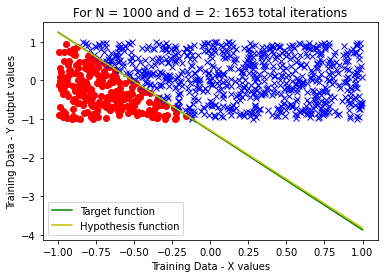

In [32]:
N = 1000

training_data = get_training_data(N,d)
tar_func = get_target_func(d)
Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

original_hyp = get_hyp_func(d)
g, iterations = perceptron(original_hyp,tar_func,training_data,Y)

plot_pla(training_data,pos_index,neg_index,tar_func,g,d,N, iterations)

**Answer**: This time, the algorithm took **503** iterations to complete. This is an obvious increase from our last experiment with N = 100 (and completed with 83 iterations). Compared to (b), this experiment took many more iterations to complete, but the hypothesis function is much closer to the target function.
***

## Part (f):

Repeat (b) with N = 1000 and d = 10.

In [33]:
N = 1000
d = 10

training_data = get_training_data(N,d)
tar_func = get_target_func(d)
Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

original_hyp = get_hyp_func(d)
g, iterations = perceptron(original_hyp,tar_func,training_data,Y)

print(iterations)

4080


**Answer**: The algorithm took **7590** iterations to converge.

## Part (g): 

Repeat (f) 100 times. 

In [17]:
N = 1000
d = 10
iter_array = []
for x in range(100):
    
    training_data = get_training_data(N,d)
    tar_func = get_target_func(d)
    Y,pos_index, neg_index = compute_true_value(training_data,tar_func)

    original_hyp = get_hyp_func(d)
    g, iterations = perceptron(original_hyp,tar_func,training_data,Y)
    iter_array.append(iterations)

n, bins, patches = plt.hist(iter_array, bins=30, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Number of iterations")
plt.ylabel("Number of experiments inside each bin")
plt.show()

KeyboardInterrupt: 

The code to display the histagram was modified from [Arseny Turin](https://medium.com/@arseniytyurin/how-to-make-your-histogram-shine-69e432be39ca).

**Answer**: The historgram shows us that the algorithm most often takes between **2500** and **5000** iterations to converge with d = 10 dimensions N = 1000 data points.
***

## Part (h):

In conclusion, as N increases, so does the accuracy of g. However, we also see an increase in runtime as we increase N. In terms of d, as expected we also increase the runtime of the algorithm as we increase d.